In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(600, 600)


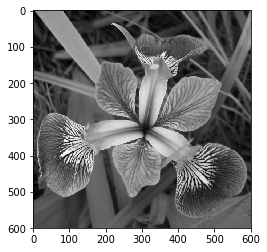

In [2]:
path = 'C:\\David\\iris.jpg'
imag = cv2.imread(path, 0)
print(imag.shape)
plt.imshow(imag, 'gray')
plt.show()

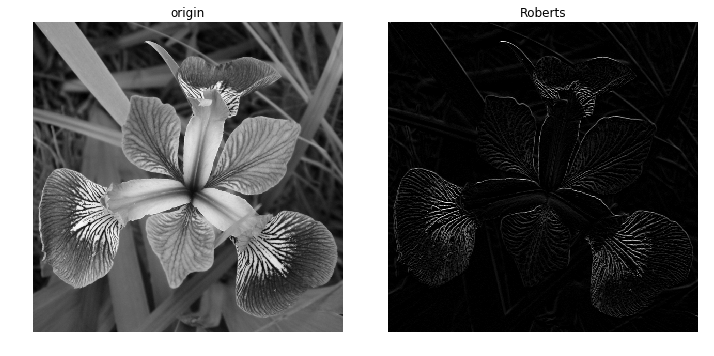

In [3]:
#https://blog.csdn.net/eastmount/article/details/89001702
# Roberts filter
kx_rob = np.array([[-1,0],[0,1]])
ky_rob = np.array([[0,-1],[1,0]])

AsRob_x = cv2.filter2D(imag, -1, kx_rob) # -1 means you keep the depth of photo same
AsRob_y = cv2.filter2D(imag, -1, ky_rob)

Abs_x = cv2.convertScaleAbs(AsRob_x) # cv2.covertScaleAbs() can transform the values into uint8
Abs_y = cv2.convertScaleAbs(AsRob_y)

imag_rob = cv2.addWeighted(Abs_x, 0.5, Abs_y, 0.5, gamma = 0) #gamma是加到最后结果上的一个值

plt.figure(figsize=(10,5))
#用来正常显示中文标签
# plt.rcParams['font.sans-serif']=['SimHei']
plt.subplot(121), plt.title('origin'), plt.axis('off'), plt.imshow(imag, 'gray')
plt.subplot(122), plt.title('Roberts'), plt.axis('off'),plt.imshow(imag_rob, 'gray')
plt.tight_layout(True)
plt.show()

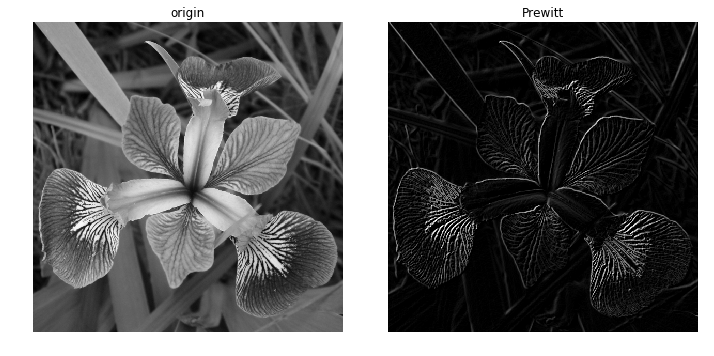

In [4]:
# Prewitt filter
kx_prew = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
ky_prew = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

AsPrew_x = cv2.filter2D(imag, -1, kx_prew)
AsPrew_y = cv2.filter2D(imag, -1, ky_prew)

Abs_x = cv2.convertScaleAbs(AsPrew_x)
Abs_y = cv2.convertScaleAbs(AsPrew_y)

imag_prew = cv2.addWeighted(Abs_x, 0.5, Abs_y, 0.5, 0)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.title('origin'), plt.axis('off'), plt.imshow(imag, 'gray')
plt.subplot(122), plt.title('Prewitt'), plt.axis('off'),plt.imshow(imag_prew, 'gray')
plt.tight_layout(True)
plt.show()

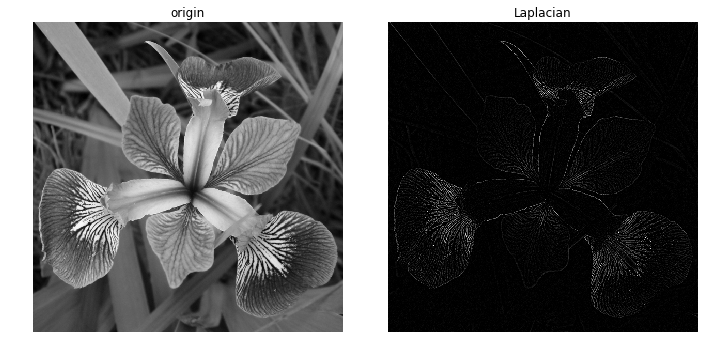

In [5]:
# Laplacian filter
kernel_lap = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

AsLap = cv2.filter2D(imag, -1, kernel_lap)
imag_lap = cv2.convertScaleAbs(AsLap)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.title('origin'), plt.axis('off'), plt.imshow(imag, 'gray')
plt.subplot(122), plt.title('Laplacian'), plt.axis('off'),plt.imshow(imag_lap, 'gray')
plt.tight_layout(True)
plt.show()